In [362]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [363]:
data = pd.read_csv('data1.csv', sep=";")

df = pd.DataFrame(data=data)

df.head()

,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,...,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,class
0,"9,1817","11,4283","8,4781","2,4874","0,02292","0,55527","-1,6334","-1,5144","0,39725","0,61775",...,"0,029594","0,015351","0,014642","0,019681","0,012829","0,021703","0,017089","0,010043","0,01213",1
1,"9,6074","12,1387","8,5008","2,8986","-0,46733","0,45984","-1,3427","-1,6759","0,17695","0,72944",...,"0,038709","0,012191","0,0255","0,019374","0,010645","0,020296","0,015389","0,015488","0,016128",1
2,"9,0512","11,3956","7,6362","3,2208","-0,48228","0,28918","-1,7334","-1,4929","0,7052","0,51173",...,"0,039222","0,025675","0,024607","0,024819","0,016553","0,023186","0,017217","0,015073","0,016257",1
3,"9,8453","13,7399","6,7365","3,1023","0,75419","-1,559","-1,0083","-0,65556","0,86495","1,4837",...,"0,018382","0,018555","0,017274","0,016129","0,015533","0,011976","0,015529","0,01377","0,015713",1
4,"10,1542","14,7643","6,4634","2,9451","0,8321","-1,755","-1,0392","-0,51876","0,94225","1,5498",...,"0,020515","0,017161","0,013791","0,016059","0,014382","0,012686","0,014478","0,013402","0,013618",1


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   mean_Log_energy              756 non-null    object
 1   mean_MFCC_0th_coef           756 non-null    object
 2   mean_MFCC_1st_coef           756 non-null    object
 3   mean_MFCC_2nd_coef           756 non-null    object
 4   mean_MFCC_3rd_coef           756 non-null    object
 5   mean_MFCC_4th_coef           756 non-null    object
 6   mean_MFCC_5th_coef           756 non-null    object
 7   mean_MFCC_6th_coef           756 non-null    object
 8   mean_MFCC_7th_coef           756 non-null    object
 9   mean_MFCC_8th_coef           756 non-null    object
 10  mean_MFCC_9th_coef           756 non-null    object
 11  mean_MFCC_10th_coef          756 non-null    object
 12  mean_MFCC_11th_coef          756 non-null    object
 13  mean_MFCC_12th_coef          756 no

In [365]:
df.isnull().sum()

mean_Log_energy         0
mean_MFCC_0th_coef      0
mean_MFCC_1st_coef      0
mean_MFCC_2nd_coef      0
mean_MFCC_3rd_coef      0
                       ..
std_9th_delta_delta     0
std_10th_delta_delta    0
std_11th_delta_delta    0
std_12th_delta_delta    0
class                   0
Length: 85, dtype: int64

In [366]:
obj_cols = df.select_dtypes(include='object')

for column in obj_cols.columns:
    df[column] = df[column].replace(',', '.', regex=True)
    df[column] = df[column].astype(float)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mean_Log_energy              756 non-null    float64
 1   mean_MFCC_0th_coef           756 non-null    float64
 2   mean_MFCC_1st_coef           756 non-null    float64
 3   mean_MFCC_2nd_coef           756 non-null    float64
 4   mean_MFCC_3rd_coef           756 non-null    float64
 5   mean_MFCC_4th_coef           756 non-null    float64
 6   mean_MFCC_5th_coef           756 non-null    float64
 7   mean_MFCC_6th_coef           756 non-null    float64
 8   mean_MFCC_7th_coef           756 non-null    float64
 9   mean_MFCC_8th_coef           756 non-null    float64
 10  mean_MFCC_9th_coef           756 non-null    float64
 11  mean_MFCC_10th_coef          756 non-null    float64
 12  mean_MFCC_11th_coef          756 non-null    float64
 13  mean_MFCC_12th_coef 

In [368]:
df.describe()

,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,...,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,9.832618,14.938332,6.294860,1.263836,0.194429,-1.426050,-0.804490,-1.184418,0.106614,0.405209,...,0.023900,0.021842,0.021152,0.019708,0.018312,0.017767,0.017584,0.016480,0.015843,0.746032
std,0.542421,2.252955,1.618435,1.665414,1.621388,1.268751,1.046418,0.842218,0.817027,0.841628,...,0.009067,0.007927,0.006775,0.006113,0.005126,0.005124,0.005248,0.004404,0.004287,0.435568
min,5.700300,5.245700,0.593060,-3.556600,-4.620100,-5.027200,-4.199100,-3.983600,-2.410600,-2.850800,...,0.009497,0.008383,0.009302,0.006962,0.008979,0.007248,0.006514,0.007737,0.006860,0.000000
25%,9.575175,13.751350,5.311725,0.214117,-0.991753,-2.238700,-1.515375,-1.715250,-0.452715,-0.100130,...,0.017551,0.016375,0.016405,0.015301,0.014619,0.014042,0.013947,0.013445,0.012736,0.000000
50%,9.913200,15.080650,6.394450,1.371750,0.163815,-1.416450,-0.850205,-1.172850,0.114595,0.400670,...,0.021220,0.019484,0.019261,0.018355,0.017299,0.016518,0.016592,0.015711,0.014964,1.000000
75%,10.214325,16.500500,7.351725,2.546875,1.308875,-0.569678,-0.129327,-0.624053,0.667122,0.942972,...,0.027858,0.024967,0.025073,0.022975,0.021313,0.020705,0.020260,0.018881,0.018217,1.000000
max,10.877400,21.277200,11.502400,5.758400,4.957900,2.606300,3.196200,1.350000,3.317600,2.926800,...,0.063242,0.060177,0.051847,0.051744,0.035376,0.035683,0.034802,0.035091,0.032520,1.000000


In [369]:
X = df.drop('class', axis=1)
Y = df['class']

In [370]:
model = PCA()
transformed = model.fit_transform(X)
print(transformed.shape)

(756, 84)


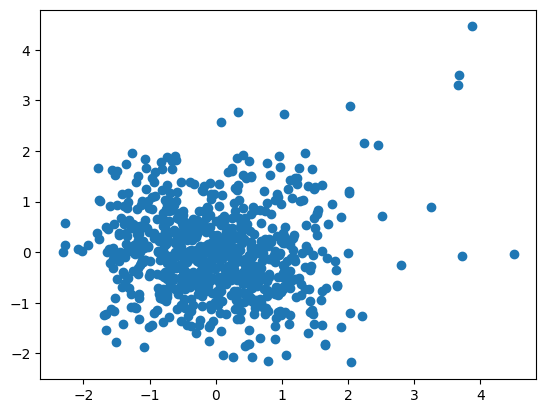

In [371]:
transformed_df = pd.DataFrame(transformed)
transformed_df.corr(method = 'pearson')
plt.scatter(transformed[:,5], transformed[:,6])
plt.show()

In [372]:
scaler = StandardScaler()
pipeline = make_pipeline(scaler, model)
pipeline.fit(X)
features = range(model.n_components_)
pca_features= PCA(n_components = 9)
dimension_reduction_result = pca_features.fit_transform(X)
print(dimension_reduction_result.shape)

(756, 9)


In [373]:
x_train, x_test, y_train, y_test = train_test_split(dimension_reduction_result, Y, test_size= 0.2, random_state= 42)

In [374]:
def KNN_train(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier

    # K-NN modelini eğitme
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = knn_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [375]:
accuracy = KNN_train(x_train, x_test, y_train, y_test)
print(accuracy)

0.9078947368421053
